# Gemini API

This notebooks contain examples on how to use the Gemini Python API and showcases some of its features.

_Authored By:_ Enrique Noriega
_Last Edited:_ 09/18/2024

## Install the python package

In [1]:
%pip install -U -q "google-generativeai>=0.7.2" # Install the Python SDK

Note: you may need to restart the kernel to use updated packages.


## Set up the environment

In [1]:
import google.generativeai as genai
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

Let's test a prompt to make sure it works well.

In [24]:
model = genai.GenerativeModel('gemini-1.5-flash')	# Request the flash model, which has a free tier

# To prompt the model, use `generate_content`
response = model.generate_content("Write a Haiku about Tucson")

# See the response
print(response.text)

Sun-baked desert air,
Saguaro arms reach for sky,
Tucson's warmth embraces. 



In [25]:
# There is additional metadata in the response object
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "Sun-baked desert air,\nSaguaro arms reach for sky,\nTucson's warmth embraces. \n"
              }
            ],
            "role": "model"
          },
          "finish_reason": "STOP",
          "index": 0,
          "safety_ratings": [
            {
              "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HATE_SPEECH",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_HARASSMENT",
              "probability": "NEGLIGIBLE"
            },
            {
              "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
              "probability": "NEGLIGIBLE"
            }
          ]
 

## Multi-modal prompting with Gemini

Gemini supports mixed input prompts. Let's try a visual Q&A example

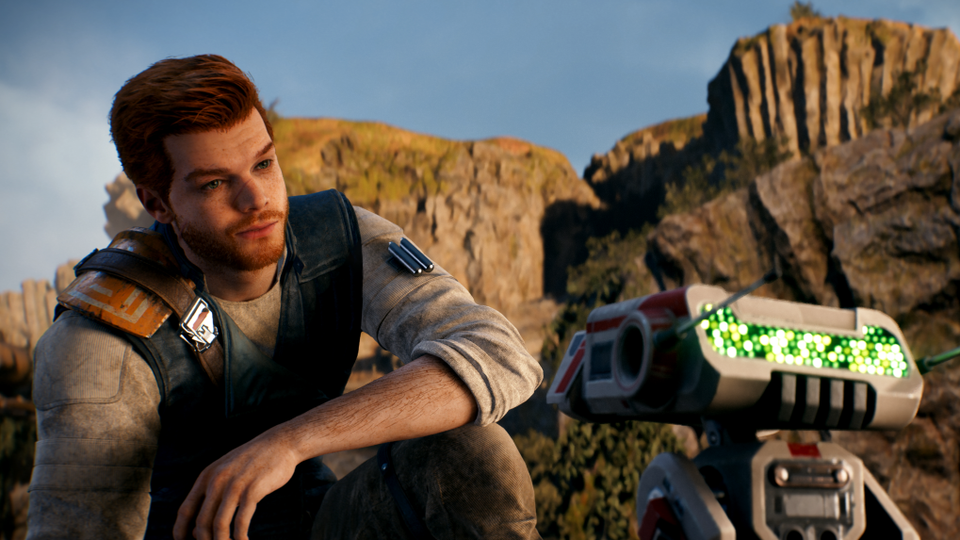

In [5]:
# This is an image of a AAA game released not too long ago

import PIL.Image
img = PIL.Image.open('starwars.png')
img

In [9]:
# Import notebook utilities
from IPython.display import display, Markdown

# Write a prompt with questions about the image
prompt = """The following image depicts a scene in a recently released video game. 
			Using markdown as your output format, answer the following questions about it. Format your output to have a title.
			1. How many characters do you see?
			2. How does the background of the scene looks like?
			3. What is the fictional universe in which this scene takes place?
			4. Describe the scene with detail.
			"""

# By adding both objects to the method call, we can ask about both
response = model.generate_content([prompt, img])
# Inspect the results
display(Markdown(response.text))

#  Star Wars Jedi: Fallen Order Scene Analysis

1.  There are two characters visible in the scene: a human male and a droid.
2.  The background of the scene features rocky cliffs and a vast expanse of sky. The rocks are mostly brown and grey with some patches of green vegetation. The sky is a vibrant blue with a hint of orange near the horizon, indicating either sunset or sunrise.
3.  This scene takes place in the Star Wars universe, a popular science fiction setting known for its iconic characters, spaceships, and intergalactic adventures. 
4. The scene depicts a human male with red hair and a beard, dressed in a casual yet utilitarian outfit. He is wearing a grey shirt under a blue vest. His left arm has a brown and yellow strap across his shoulder, with a silver buckle and a pouch attached. He is kneeling with his right leg bent, his right arm resting on his thigh, and his left hand on his knee. His face is turned towards the viewer, with a thoughtful expression, and his eyes seem to be focused on something beyond the camera. In front of him, a white and red droid stands with its "head" turned towards the viewer. Its head features a row of green lights and its eyes are black, suggesting it is some form of an astromech droid.  The droid is smaller than the man and seems to be  looking at him. There is a feeling of tension or anticipation in the scene, as the characters are seemingly engaged in some kind of discussion or waiting for something to happen. The overall atmosphere is quite serene, with the vastness of the sky and the rocky cliffs setting the mood for a possible epic adventure.

## Operating over PDF files

Another useful modality is _files_. We can use this to "chat with your PDFs"

In [10]:
# Upload the file and print a confirmation
sample_file = genai.upload_file(path="README.pdf",
                                display_name="GenAI Workshop PDF")

print(f"Uploaded file '{sample_file.display_name}' as: {sample_file.uri}")

Uploaded file 'GenAI Workshop PDF' as: https://generativelanguage.googleapis.com/v1beta/files/b4qif4xaeojp


In [11]:
# Prompt the model with text and the previously uploaded document.
response = model.generate_content([sample_file,
								 "Can you summarize this document as a bulleted list? Use markdown format and add a title and subtitles for the summary of each section"])

display(Markdown(response.text))

# Exploring the LLM Frontier: From Hugging Face to RAG and Beyond

## What is Generative AI?
- Generative AI is a subset of artificial intelligence that focuses on creating new content.
- It learns patterns from existing data and generates new, original content, including text, images, music, and code.

## Why Learn About Generative AI?
- **Innovation:** It's driving advancements in various industries, from art and design to healthcare and science.
- **Career Opportunities:** The demand for professionals skilled in generative AI is rapidly growing.
- **Problem-Solving:** Generative AI offers solutions to complex challenges, from content creation to drug discovery.
- **Ethical Considerations:** It's important to understand its potential impacts and ethical implications.

## Applications of Generative AI
- **Content Creation:** Generating text, images, music, and videos.
- **Drug Discovery:** Accelerating the development of new drugs.
- **Design:** Creating innovative designs for products and architecture.
- **Customer Service:** Developing advanced chatbots and virtual assistants.
- **Education:** Personalized learning experiences and intelligent tutoring systems.

## Hugging Face: A Hub for Generative AI
- Hugging Face is a central platform for the generative AI community.
- It provides pre-trained models, datasets, tools, and a thriving community.

## The Power Trio: Langchain, Gradio, and RAG for LLM Applications
- **Langchain (The Architect):** Connects LLMs to external data sources, creates complex workflows, manages prompts and responses.
- **Gradio (The Interface Builder):** Creates interactive demos and web applications for LLMs, visualizes outputs, and facilitates user input.
- **RAG (The Knowledge Booster):** Provides access to external information sources, improves accuracy and relevance, and expands LLM capabilities.

## Combined Power
- **Building Sophisticated LLM Applications:** Create complex systems that leverage the strengths of LLMs and external data.
- **Deploying Models Effectively:** Create user-friendly interfaces for your LLM applications.
- **Improving Model Performance:** Enhance LLM accuracy and relevance through RAG.
- **Accelerating Development:** Streamline the development process with pre-built components.

## Calendar of Events
- The document contains a calendar of events related to the LLM Frontier series, covering topics like Hugging Face Models, Computer Vision, Multimodal Models, Running LLM Locally with Ollama, Introduction to Langchain, Getting Started with Phi-3 and Gemini, Introduction to Gradio, and Introduction to RAG.

In [13]:
response = model.generate_content([sample_file, "Who wrote this document and when?"])
print(response.text)

The document was created on 07/18/2024 and updated on 07/19/2024 by Carlos Lizárraga.


## Chat with Gemini

Gemini's API supports chat conversations. Conversations have history and in the case of Gemini, we don't have to manage them.

In [17]:
# Instead of the `generate_content` method, use the `start_chat`

chat = model.start_chat(history=[
	{"role": "user", "parts": "You are a professor of physics holding office hours for graduate students"},
	{"role": "model", "parts": "Enrique, how can I help you today?"},
])

# Send messages and wait for the response
response = chat.send_message("Professor, I don't understand what is a qbit")
print(response.text)

Ah, a classic question!  It's understandable you're confused, as it seems like a simple concept, but it's got some real depth. 

Let's start with the basics. A qubit, short for quantum bit, is the basic unit of information in quantum computing.  Just like a regular bit in a normal computer can be either 0 or 1, a qubit can be 0, 1, or a **combination of both**. 

Now, that last part is the key difference. In a normal computer, a bit is always in a definite state, either 0 or 1. But in a quantum computer, a qubit can exist in a **superposition**, meaning it can be both 0 and 1 simultaneously.

Think of it like flipping a coin. In the classical world, the coin is either heads or tails. But in the quantum world, the coin can be both heads and tails at the same time, until you actually look at it and "measure" its state.

This superposition is what gives quantum computers their potential power. By manipulating these qubits in their superposition states, we can perform calculations that are

In [18]:
# Follow up question
response = chat.send_message("Okay, so, if the properties of the qbit are inherently different, how can we write algorithms in classical computers?")
print(response.text)

That's a great question! It's true that simulating quantum systems on classical computers is incredibly difficult, and even impossible for large-scale quantum systems. 

Here's how we can approach this:

* **Approximations:** For smaller systems, we can use classical computers to approximate the behavior of qubits.  This involves simplifying the quantum mechanics involved and using mathematical models to approximate the superposition and entanglement of the qubits.
* **Quantum Emulators:**  Specialized classical computers can be designed to be more efficient at simulating certain quantum algorithms. These emulators are essentially designed to handle the specific mathematical operations required to model qubits, but they are still limited by the size and complexity of the quantum system they can simulate.
* **Hybrid Systems:**  Many believe the future lies in hybrid systems that combine classical and quantum computing.  This approach uses classical computers for parts of the algorithm t

In [19]:
# Follow up question
response = chat.send_message("Thank you. Now, please summarize all you've told me today into concise bullet points")
print(response.text)

You're welcome!  Here's a summary of our discussion:

* **What is a qubit?**
    * The basic unit of information in quantum computing.
    * Unlike a classical bit (0 or 1), a qubit can be in a superposition of both 0 and 1 simultaneously.
    * This superposition property allows quantum computers to perform calculations that are impossible for classical computers.

* **Why is it difficult to write algorithms for quantum computers on classical computers?**
    * Simulating quantum systems accurately on classical computers is incredibly difficult and often impossible for large systems.
    * This is because classical computers struggle to represent the superposition and entanglement inherent in quantum systems.

* **How can we bridge the gap?**
    * **Approximations:**  Classical computers can be used to approximate the behavior of qubits for smaller systems.
    * **Quantum emulators:** Specialized classical computers can be designed to be more efficient at simulating certain quantum 

## Code Execution

We can leverage the code execution engine with Gemini. Code execution works in an isolated backend sandbox environment. 

In [20]:
# Let's try to generate a regular expression to detect URLS

model = genai.GenerativeModel(model_name='gemini-1.5-flash',
                              tools='code_execution')

chat = model.start_chat()

response = chat.send_message("Write a python function that uses a regular expression to detect a URL. Your output has to be inside a markdown code block")

display(Markdown(response.text))

```python
import re

def detect_url(text):
  """Detects a URL in a given text using a regular expression.

  Args:
    text: The text to search for a URL.

  Returns:
    A string containing the detected URL, or None if no URL is found.
  """
  url_pattern = r'https?://(?:www.[^/]+|[^\/]+)\.[a-z]{2,}(?:\/\S*)?'
  match = re.search(url_pattern, text)
  if match:
    return match.group(0)
  else:
    return None

```

In [21]:
# Now adjust it to extract the different parts of it
response = chat.send_message("Update the code to use named groups for each component of the URL and return a dictionary with the match of each.")

display(Markdown(response.text))

```python
import re

def detect_url(text):
  """Detects a URL in a given text using a regular expression.

  Args:
    text: The text to search for a URL.

  Returns:
    A dictionary containing the matched components of the URL, or None if no URL is found.
  """
  url_pattern = r'(?P<protocol>https?://)(?P<domain>(?:www\.)?(?P<hostname>[^/]+)\.(?P<tld>[a-z]{2,}))(?P<path>(?:\/\S*)?)'
  match = re.search(url_pattern, text)
  if match:
    return match.groupdict()
  else:
    return None

```

In [22]:
# Now let's execute that function
response = chat.send_message("Run the latest version of your detect_url function with the following input, then print the results in markdown: https://github.com/ua-datalab/Generative-AI/tree/main")

display(Markdown(response.text))


``` python
import re

def detect_url(text):
  """Detects a URL in a given text using a regular expression.

  Args:
    text: The text to search for a URL.

  Returns:
    A dictionary containing the matched components of the URL, or None if no URL is found.
  """
  url_pattern = r'(?P<protocol>https?://)(?P<domain>(?:www\.)?(?P<hostname>[^/]+)\.(?P<tld>[a-z]{2,}))(?P<path>(?:\/\S*)?)'
  match = re.search(url_pattern, text)
  if match:
    return match.groupdict()
  else:
    return None

text = 'https://github.com/ua-datalab/Generative-AI/tree/main'
result = detect_url(text)
print(result)

```
```
{'protocol': 'https://', 'domain': 'github.com', 'hostname': 'github', 'tld': 'com', 'path': '/ua-datalab/Generative-AI/tree/main'}

```
The code has successfully extracted the different components of the URL:

- **protocol:** `https://`
- **domain:** `github.com`
- **hostname:** `github`
- **tld:** `com`
- **path:** `/ua-datalab/Generative-AI/tree/main` 


In [23]:
# Do it with an invalid URL
response = chat.send_message("Run the latest version of detect_url using the following input, then print the results in markdown: invalid://github.com/ua-datalab/Generative-AI/tree/main")

display(Markdown(response.text))


``` python
import re

def detect_url(text):
  """Detects a URL in a given text using a regular expression.

  Args:
    text: The text to search for a URL.

  Returns:
    A dictionary containing the matched components of the URL, or None if no URL is found.
  """
  url_pattern = r'(?P<protocol>https?://)(?P<domain>(?:www\.)?(?P<hostname>[^/]+)\.(?P<tld>[a-z]{2,}))(?P<path>(?:\/\S*)?)'
  match = re.search(url_pattern, text)
  if match:
    return match.groupdict()
  else:
    return None

text = 'invalid://github.com/ua-datalab/Generative-AI/tree/main'
result = detect_url(text)
print(result)

```
```
None

```
The code returned `None`, indicating that no URL was found in the input text. This is because the input `invalid://github.com/ua-datalab/Generative-AI/tree/main` does not match the regular expression pattern used by the `detect_url` function. The `protocol` part of the URL is `invalid://`, which is not recognized by the pattern, which expects either `http://` or `https://`. 


This concludes our excersice. Gemini supports more features. Code can be executed locally via _tools_. It also supports audio inputs and long context prompts.

Be sure to look at the documentation to find inspiration for your new AI-powered app!